In [1]:
print('Evaluate if given numbers can reach 24 (sure/likely/impossible)\n10 14\n10 + 14 = 24\nsure\n11 12\n11 + 12 = 23\n12 - 11 = 1\n11 * 12 = 132\n11 / 12 = 0.91\nimpossible\n4 4 10\n4 + 4 + 10 = 8 + 10 = 18\n4 * 10 - 4 = 40 - 4 = 36\n(10 - 4) * 4 = 6 * 4 = 24\nsure\n4 9 11\n9 + 11 + 4 = 20 + 4 = 24\nsure\n5 7 8\n5 + 7 + 8 = 12 + 8 = 20\n(8 - 5) * 7 = 3 * 7 = 21\nI cannot obtain 24 now, but numbers are within a reasonable range\nlikely\n5 6 6\n5 + 6 + 6 = 17\n(6 - 5) * 6 = 1 * 6 = 6\nI cannot obtain 24 now, but numbers are within a reasonable range\nlikely\n10 10 11\n10 + 10 + 11 = 31\n(11 - 10) * 10 = 10\n10 10 10 are all too big\nimpossible\n1 3 3\n1 * 3 * 3 = 9\n(1 + 3) * 3 = 12\n1 3 3 are all too small\nimpossible\n8 8 9.5 14\n')

Evaluate if given numbers can reach 24 (sure/likely/impossible)
10 14
10 + 14 = 24
sure
11 12
11 + 12 = 23
12 - 11 = 1
11 * 12 = 132
11 / 12 = 0.91
impossible
4 4 10
4 + 4 + 10 = 8 + 10 = 18
4 * 10 - 4 = 40 - 4 = 36
(10 - 4) * 4 = 6 * 4 = 24
sure
4 9 11
9 + 11 + 4 = 20 + 4 = 24
sure
5 7 8
5 + 7 + 8 = 12 + 8 = 20
(8 - 5) * 7 = 3 * 7 = 21
I cannot obtain 24 now, but numbers are within a reasonable range
likely
5 6 6
5 + 6 + 6 = 17
(6 - 5) * 6 = 1 * 6 = 6
I cannot obtain 24 now, but numbers are within a reasonable range
likely
10 10 11
10 + 10 + 11 = 31
(11 - 10) * 10 = 10
10 10 10 are all too big
impossible
1 3 3
1 * 3 * 3 = 9
(1 + 3) * 3 = 12
1 3 3 are all too small
impossible
8 8 9.5 14



In [31]:
def get_votes(x):
    print(x)
    return votes[x]
votes = { "proposition": 0, "sampling": 1 }
result = max(votes, key=votes.get)
print(result)

sampling


In [13]:
votes.get('proposition')

0

In [33]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


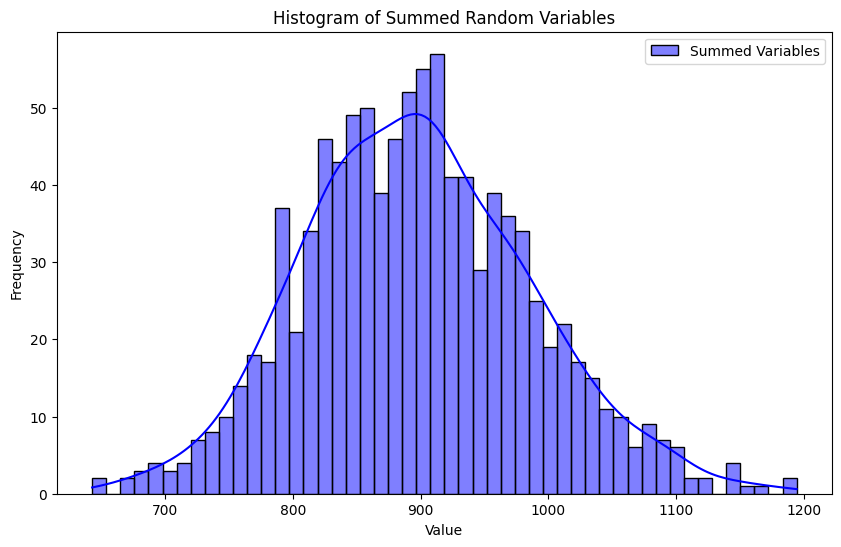

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Union

# Number of random variables in the summation
num_variables = 100

# Number of samples to generate for the summation
num_samples: Union[int, float] = 1000
# Define different distributions
distributions = [
    # lambda size: np.random.uniform(-1, 1, size),  # Uniform distribution
    lambda size: np.random.exponential(9, size),  # Exponential distribution
    # lambda size: np.random.poisson(1, size),      # Poisson distribution
    # lambda size: np.random.normal(0, 1, size),   # Normal distribution
]

# Generate the sum of the variables
sums = np.zeros(num_samples)

i = 0
while i < num_variables:
    for dist in distributions:
        sums += dist(num_samples)
        i += 1

# Normalize the sum to zero mean and unit variance
# sums = (sums - np.mean(sums)) / np.std(sums)

# Plot the histogram of the sum
plt.figure(figsize=(10, 6))
sns.histplot(sums, bins=50, kde=True, color='blue', label='Summed Variables')
plt.title('Histogram of Summed Random Variables')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [111]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [112]:
print("Model's state_dict:")
for param_tensor in net.state_dict():
    print(param_tensor, "\t", net.state_dict()[param_tensor].size())


Model's state_dict:
conv1.weight 	 torch.Size([6, 3, 5, 5])
conv1.bias 	 torch.Size([6])
conv2.weight 	 torch.Size([16, 6, 5, 5])
conv2.bias 	 torch.Size([16])
fc1.weight 	 torch.Size([120, 400])
fc1.bias 	 torch.Size([120])
fc2.weight 	 torch.Size([84, 120])
fc2.bias 	 torch.Size([84])
fc3.weight 	 torch.Size([10, 84])
fc3.bias 	 torch.Size([10])


In [3]:
import heapq

# Create a priority queue
pq = [(2, 'Task 2'), (1, 'Task 1'), (3, 'Task 3')]

# Add elements to the priority queue
heapq.heappush(pq, (2, 'Task 2'))
heapq.heappush(pq, (1, 'Task 1'))
heapq.heappush(pq, (3, 'Task 3'))

# # Pop elements from the priority queue (in priority order)
# while pq:
#     priority, task = heapq.heappop(pq)
#     print(f'Priority: {priority}, Task: {task}')

In [80]:

pq = [(2, 'Task 2'), (1, 'Task 1'), (3, 'Task 3'), (1, 'Task 1.1'), (1, 'Task 1.2'), (1, 'Task 1.3'), (0, 'Task 0'),(2, 'Task 2.1'),(2, 'Task 2.2')]

In [81]:
pq

[(2, 'Task 2'),
 (1, 'Task 1'),
 (3, 'Task 3'),
 (1, 'Task 1.1'),
 (1, 'Task 1.2'),
 (1, 'Task 1.3'),
 (0, 'Task 0'),
 (2, 'Task 2.1'),
 (2, 'Task 2.2')]

In [95]:
import heapq
pd_copy = pq.copy()
heapq.heapify(pd_copy)
pd_copy

[(0, 'Task 0'),
 (1, 'Task 1'),
 (1, 'Task 1.3'),
 (1, 'Task 1.1'),
 (1, 'Task 1.2'),
 (2, 'Task 2'),
 (3, 'Task 3'),
 (2, 'Task 2.1'),
 (2, 'Task 2.2')]

In [84]:
pq

[(2, 'Task 2'),
 (1, 'Task 1'),
 (3, 'Task 3'),
 (1, 'Task 1.1'),
 (1, 'Task 1.2'),
 (1, 'Task 1.3'),
 (0, 'Task 0'),
 (2, 'Task 2.1'),
 (2, 'Task 2.2')]

In [105]:
import random
index = random.randint(-6, 0)

In [109]:
pd_copy

[(0, 'Task 0'),
 (1, 'Task 1'),
 (1, 'Task 1.3'),
 (1, 'Task 1.1'),
 (1, 'Task 1.2'),
 (2, 'Task 2'),
 (3, 'Task 3'),
 (2, 'Task 2.1'),
 (2, 'Task 2.2')]

In [107]:
item = pd_copy[index]

In [106]:
index

-4

In [113]:
pq.index(item)

0

In [112]:
pd_copy.index(item)

5

In [110]:
item

(2, 'Task 2')

In [88]:
pq.pop(item)

TypeError: 'tuple' object cannot be interpreted as an integer

In [6]:
actions = [
    'exploitation',
    'exploration_1_step',
    'exploration_2_step',
    'exploration_3_step',
    'exploration_4_step',
    'exploration_5_step',
]

heapq.heapify(actions)
actions

AttributeError: module 'heapq' has no attribute 'stackify'

In [20]:
import torch
torch.tensor([1, 2, 3]) @ torch.tensor([4, 5, 6])


tensor(32)

In [23]:
file = '09_02_01.txt'
lora_name = file.split('.')[0].split('_')[:-1]

In [24]:
lora_name

['09', '02']

In [26]:
def get_corresponding_lora_name(prompt_prefix, category = None):
    anime_lora_mapping = {
        "01": "Arknights",
        "04": "Nezuko",
        "06": "Garreg",
        "07": "Auroral",
        "08": "Bamboolight",
        "10": "Zero",
        "11": "Handdrawn", # line art
        "14": "MoXin",
        "17": "Burger",
        "18": "Goku",
        "22": "Toast",
    }

    reality_lora_mapping = {
        "02": "JFC",
        "03": "IU",
        "05": "Bright",
        "09": "Library",
        "12": "Scarlett",
        "13": "Umbrella",
        "15": "Rock",
        "16": "Forest", # (buggy prompt)
        "19": "Univ-Uniform", # (mahalai, Thai)
        "20": "School-Dress",
        "21": "Gum",
    }
    if prompt_prefix in anime_lora_mapping and (category == "anime" or category is None):
        return anime_lora_mapping[prompt_prefix]
    elif prompt_prefix in reality_lora_mapping and (category == "reality" or category is None):
        return reality_lora_mapping[prompt_prefix]
    else:
        raise ValueError(f"LoRA name {lora_name} not found in anime or reality mappings")

In [27]:
[ get_corresponding_prompt_prefix(x) for x in lora_name ]

['Library', 'JFC']

In [32]:
import glob
import os
propose = '3.5'
glob.glob(os.path.join('/Users/henryyi/Documents/University/Post-Pretraining for LLM/Final Project/AutoToT-with-Self-Reflection/tree-of-thought-llm-with-reflection/scripts/game24/logs/game24', f'*{propose}*.json'))

TypeError: expected str, bytes or os.PathLike object, not list

In [33]:
lora_set = set()

In [35]:
lora_set.update([ "232", "412" ])


{'232', '412'}

In [44]:
lora_set.update([ "412" ])

In [45]:
lora_set    

{'232', '412', 'SDSFSD', 'lsdfs', 'sdf'}

In [47]:
loss_fn = torch.nn.Softmax()

In [72]:
loss_fn(torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0])/0.1).tolist()


[0.11111054569482803,
 0.11111054569482803,
 0.11111054569482803,
 0.11111054569482803,
 0.11111054569482803,
 0.11111054569482803,
 5.044410954724299e-06,
 0.11111054569482803,
 0.11111054569482803,
 0.11111054569482803]

In [73]:
lora_set = set()

In [74]:
lora_set.update([ "232", "412" ])

In [78]:
list(lora_set)

['232', '412']

In [82]:
data = torch.randint(0, 10,(3,5,3))
data.shape


torch.Size([3, 5, 3])

In [87]:
data[:,[ 1, 2, 4, 0 ], :]

tensor([[[4, 6, 6],
         [5, 7, 3],
         [6, 9, 8],
         [6, 1, 4]],

        [[8, 0, 1],
         [2, 6, 1],
         [8, 7, 4],
         [5, 3, 0]],

        [[9, 8, 0],
         [9, 3, 5],
         [2, 9, 8],
         [6, 1, 1]]])

In [85]:
data

tensor([[[6, 1, 4],
         [4, 6, 6],
         [5, 7, 3],
         [8, 1, 2],
         [6, 9, 8]],

        [[5, 3, 0],
         [8, 0, 1],
         [2, 6, 1],
         [0, 5, 7],
         [8, 7, 4]],

        [[6, 1, 1],
         [9, 8, 0],
         [9, 3, 5],
         [5, 0, 5],
         [2, 9, 8]]])

In [3]:
date = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ]
date.slice(1, 3)


AttributeError: 'list' object has no attribute 'slice'

In [5]:
date.pop(2)

3

In [6]:
date

[1, 2, 4, 5, 6, 7, 8, 9, 10]

In [12]:
import random
sliding_window_size = 1
sliding_window_start = 0 if sliding_window_size is None else len(date) - sliding_window_size
random.randint(sliding_window_start, len(date) - 1)

8

In [13]:
sliding_window_start

8

In [14]:
len(date) - 1

8

In [21]:
random.randint(0,1)

1

In [22]:
def check_field_values_equal(elements, field):
    """
    Check if all elements in a list have the same value for a specific field.

    Args:
        elements (list): List of dictionaries.
        field (str): The key of the field to check.

    Returns:
        bool: True if all values are equal, False otherwise.
    """
    if not elements:
        return True  # Empty list is considered valid
    
    first_value = elements[0].get(field)
    return all(element.get(field) == first_value for element in elements)

In [27]:
data = [
    { 'action': 'exploration_1_step', 'level': 1 },
    { 'action': 'exploration_2_step', 'level': 1 },
    { 'action': 'exploration_3_step', 'level': 1 },
]
check_field_values_equal(data, 'level')

True

In [32]:
testDate = {"h1": 1.5, "h2": 1.7, "h3": 1.9, "h4": 2.1}

In [41]:
sorted(testDate, reverse=True)

['h4', 'h3', 'h2', 'h1']

In [34]:
testDate.get

<function dict.get(key, default=None, /)>

In [39]:
data = [1,2,3,4,5]
sorted(data, key=lambda x: [5,4,3,2,1,0][x], reverse=False)

[5, 4, 3, 2, 1]

In [116]:
def ere():
    a = 1
    b = [2,3,4]
    return a

results = ere()

In [117]:
type(results)

int

In [118]:
'sdf' in 1

TypeError: argument of type 'int' is not iterable

In [124]:
ll = [[1 ,2 ], [0 ,1]] 
heapq.heapify(ll)
ll



[[0, 1], [1, 2]]